## Libraries

In [126]:
# Matplotlib forms basis for visualization in Python
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
from collections import Counter
# from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image
import plotly.express as px
import xgboost as xgb

import seaborn as sns

sns.set()

# Graphics in SVG format are more sharp and legible
%config InlineBackend.figure_format = 'svg'

In [127]:
from fast_ml.model_development import train_valid_test_split
from sklearn.preprocessing import StandardScaler

In [190]:
from sklearn.metrics import roc_curve, auc

In [128]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [129]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
#from lightgbm import LGBMRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics.pairwise import linear_kernel
from sklearn.feature_extraction import FeatureHasher
from sklearn.feature_extraction import FeatureHasher
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import requests
from bs4 import BeautifulSoup
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
# from imblearn.metrics import classification_report_imbalanced
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [130]:
#!pip install fast-ml

## Take a first look at the data

In [131]:
cin = pd.read_csv('cin_prep.csv')

In [132]:
cin.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,war_symb_title,point_symb_title,movie_description,genres_split
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,237000000.0,2009.0,936.0,7.9,1.78,33000,4,0,A paraplegic Marine dispatched to the moon Pan...,"['Action', 'Adventure', 'Fantasy', 'Sci-Fi']"
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,300000000.0,2007.0,5000.0,7.1,2.35,0,8,0,"Captain Barbossa, Will Turner and Elizabeth Sw...","['Action', 'Adventure', 'Fantasy']"
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,245000000.0,2015.0,393.0,6.8,2.35,85000,1,0,A cryptic message from James Bond's past sends...,"['Action', 'Adventure', 'Thriller']"
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,250000000.0,2012.0,23000.0,8.5,2.35,164000,3,0,"Eight years after the Joker's reign of chaos, ...","['Action', 'Thriller']"
4,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,...,263700000.0,2012.0,632.0,6.6,2.35,24000,3,0,"Transported to Barsoom, a Civil War vet discov...","['Action', 'Adventure', 'Sci-Fi']"


In [133]:
cin.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes', 'war_symb_title',
       'point_symb_title', 'movie_description', 'genres_split'],
      dtype='object')

# Let's drop columns that we won't use now

In [134]:
df = cin

In [135]:
df = df.drop(['aspect_ratio'], axis=1)

In [136]:
df = df.drop(['genres_split'], axis=1)

In [137]:
df = df.drop(['point_symb_title'], axis=1)

In [138]:
df = df.drop(['movie_imdb_link'], axis=1)

In [139]:
df = df.drop(['war_symb_title'], axis=1)

In [140]:
df = df.drop(['movie_description'], axis=1)

In [141]:
df = df.drop(['facenumber_in_poster'], axis=1)

In [142]:
df = df.drop(['actor_2_name'], axis=1)

In [143]:
df = df.drop(['movie_title'], axis=1)

In [144]:
df = df.drop(['actor_3_name'], axis=1)

In [145]:
df = df.drop(['plot_keywords'], axis=1)

## removing outliers

In [146]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    filtered_df = df[(df[column] >= Q1 - 1.5 * IQR) & (df[column] <= Q3 + 1.5 * IQR)]
    return filtered_df

In [147]:
df.shape

(4117, 21)

In [148]:
df.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'num_voted_users', 'cast_total_facebook_likes', 'num_user_for_reviews',
       'language', 'country', 'content_rating', 'budget', 'title_year',
       'actor_2_facebook_likes', 'imdb_score', 'movie_facebook_likes'],
      dtype='object')

In [149]:
df = remove_outliers(df, 'num_critic_for_reviews')

In [150]:
df = remove_outliers(df, 'duration')

In [151]:
df = remove_outliers(df, 'director_facebook_likes')

In [152]:
df = remove_outliers(df, 'actor_3_facebook_likes')

In [153]:
df = remove_outliers(df, 'actor_1_facebook_likes')

In [154]:
df = remove_outliers(df, 'gross')

In [155]:
df = remove_outliers(df, 'num_voted_users')

In [156]:
df = remove_outliers(df, 'cast_total_facebook_likes')

In [157]:
df = remove_outliers(df, 'num_user_for_reviews')

In [158]:
df = remove_outliers(df, 'budget')

In [159]:
df = remove_outliers(df, 'actor_2_facebook_likes')

In [160]:
df = remove_outliers(df, 'movie_facebook_likes')

In [161]:
df.shape

(1835, 21)

In [162]:
#show num US and non-us

In [165]:
usa_movies_count = df[df['country'] == 'USA'].shape[0]
usa_movies_count

1376

In [169]:
df.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'num_voted_users', 'cast_total_facebook_likes', 'num_user_for_reviews',
       'language', 'country', 'content_rating', 'budget', 'title_year',
       'actor_2_facebook_likes', 'imdb_score', 'movie_facebook_likes'],
      dtype='object')

In [171]:
cat_vars = ['color', 'language', 'country', 'content_rating']

for var in cat_vars:
    print("Summary statistics for", var)
    print(df[var].value_counts(normalize=True))

Summary statistics for color
Color              0.970027
Black and White    0.029973
Name: color, dtype: float64
Summary statistics for language
English       0.930245
French        0.019619
Spanish       0.010354
Hindi         0.004905
Cantonese     0.004905
Mandarin      0.003815
German        0.003270
Portuguese    0.002180
Italian       0.002180
Hebrew        0.002180
Japanese      0.001635
Russian       0.001635
Persian       0.001635
Dari          0.001090
Dutch         0.001090
Swedish       0.001090
Arabic        0.001090
Korean        0.001090
Mongolian     0.000545
Kazakh        0.000545
Filipino      0.000545
Icelandic     0.000545
Chinese       0.000545
Aboriginal    0.000545
Czech         0.000545
Zulu          0.000545
Norwegian     0.000545
Dzongkha      0.000545
Vietnamese    0.000545
Name: language, dtype: float64
Summary statistics for country
USA               0.749864
UK                0.092098
France            0.034877
Canada            0.026158
Germany           

In [287]:
df.shape

(1835, 21)

# Let's split our data in train, test, val sets

In [36]:
X_train, y_train, X_valid, y_valid, X_test, y_test = train_valid_test_split(df, target = 'gross', 
                                                                            method='sorted', sort_by_col='gross',
                                                                            train_size=0.8, valid_size=0.1, 
                                                                            test_size=0.1)

print(X_train.shape), print(y_train.shape)
print(X_valid.shape), print(y_valid.shape)
print(X_test.shape), print(y_test.shape)

(1468, 20)
(1468,)
(183, 20)
(183,)
(184, 20)
(184,)


(None, None)

## Now we will work only with train set. Let's do encoding

In [37]:
X_train.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,genres,actor_1_name,num_voted_users,cast_total_facebook_likes,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,movie_facebook_likes
3039,Color,Ekachai Uekrongtham,66.0,96.0,3.0,305.0,2000.0,Action|Crime|Thriller,Michael Jai White,5228,2802,38,English,Thailand,R,9.000000e+06,2014.0,368.0,5.7,0
3903,Color,Frank Whaley,9.0,96.0,436.0,4.0,474.0,Comedy|Drama,Lynn Cohen,480,920,21,English,USA,R,1.500000e+06,2001.0,436.0,5.4,47
3902,Color,Brian Trenchard-Smith,8.0,88.0,53.0,176.0,563.0,Action|Drama,David Keith,783,1284,12,English,Germany,R,1.000000e+06,2006.0,288.0,4.1,42
3213,Color,Ian Fitzgibbon,54.0,88.0,11.0,415.0,1000.0,Action|Comedy|Crime|Drama|Romance|Thriller,Jim Broadbent,5133,2728,31,English,Ireland,R,4.103382e+07,2009.0,418.0,6.4,663
4062,Color,Ricki Stern,11.0,106.0,15.0,0.0,2.0,Crime|Documentary,Darryl Hunt,771,2,10,English,USA,PG-13,2.000000e+05,2006.0,0.0,7.7,246


---

In [38]:
X_train['color_ohe'] = (X_train['color'] == 'Color').astype(int)
X_train['language_ohe'] = (X_train['language'] == 'English').astype(int)
X_train['is_USA'] = (X_train['country'] == 'USA').astype(int)

In [39]:
X_valid['color_ohe'] = (X_valid['color'] == 'Color').astype(int)
X_valid['language_ohe'] = (X_valid['language'] == 'English').astype(int)
X_valid['is_USA'] = (X_valid['country'] == 'USA').astype(int)

In [40]:
X_test['color_ohe'] = (X_test['color'] == 'Color').astype(int)
X_test['language_ohe'] = (X_test['language'] == 'English').astype(int)
X_test['is_USA'] = (X_test['country'] == 'USA').astype(int)

In [41]:
genres_splitted = X_train['genres'].str.split('|')
unique_genres = list(set([g for l_g in genres_splitted for g in l_g ]))
len(unique_genres)

22

In [42]:
genres_frequency = {}
for g in unique_genres:
    n_times = genres_splitted.apply(lambda v: g in v).sum()
    genres_frequency[g] = n_times

In [43]:
selected_genres = [g for g in genres_frequency if genres_frequency[g] > 300]
selected_genres

['Comedy', 'Thriller', 'Romance', 'Drama']

In [44]:
train_genres = pd.DataFrame(columns=selected_genres)
for g in selected_genres:
    train_genres[g] = genres_splitted.apply(lambda v: g in v).astype(int)

train_genres

,Comedy,Thriller,Romance,Drama
3039,0,1,0,0
3903,1,0,0,1
3902,0,0,0,1
3213,1,1,1,1
4062,0,0,0,0
...,...,...,...,...
949,1,0,1,1
2323,1,0,0,1
2063,0,0,0,0
375,0,0,0,0


In [45]:
X_train = pd.concat([X_train, train_genres], axis=1)

---

In [46]:
genres_splitted = X_valid['genres'].str.split('|')

valid_genres = pd.DataFrame(columns=selected_genres)
for g in selected_genres:
    valid_genres[g] = genres_splitted.apply(lambda v: g in v).astype(int)

X_valid = pd.concat([X_valid, valid_genres], axis=1)

---

In [47]:
genres_splitted = X_test['genres'].str.split('|')

test_genres = pd.DataFrame(columns=selected_genres)
for g in selected_genres:
    test_genres[g] = genres_splitted.apply(lambda v: g in v).astype(int)

test_genres

,Comedy,Thriller,Romance,Drama
2208,0,1,0,1
1544,1,0,1,0
3309,0,0,0,1
1169,0,1,0,1
1359,0,0,0,1
...,...,...,...,...
2032,1,0,0,0
1768,0,0,1,1
1514,0,1,0,0
668,0,1,0,1


In [48]:
X_test = pd.concat([X_test, test_genres], axis=1)

---

In [49]:
scaler = StandardScaler()

In [50]:
scaler.fit(X_train[["budget"]])

StandardScaler()

In [51]:
X_train["budget_normalized"] = scaler.transform(X_train[["budget"]])
X_test["budget_normalized"] = scaler.transform(X_test[["budget"]])
X_valid["budget_normalized"] = scaler.transform(X_valid[["budget"]])

In [52]:
features = ['color_ohe', 'num_critic_for_reviews', 'duration', 'director_facebook_likes', 
            'cast_total_facebook_likes', 'language_ohe', 'is_USA', 'budget_normalized', 'title_year', 'imdb_score',
           *selected_genres]

---

In [53]:
scaler.fit(y_train.values.reshape(-1, 1))

StandardScaler()

In [54]:
y_train_normalized = scaler.transform(y_train.values.reshape(-1, 1))
y_test_normalized = scaler.transform(y_test.values.reshape(-1, 1))
y_valid_normalized = scaler.transform(y_valid.values.reshape(-1, 1))

---

1. Scale gross (1 std 0 mean)
2. no longer work with MAPE -> use MSE (MAE)

In [55]:
rf_model = RandomForestRegressor(n_estimators=1, min_samples_split=10) 
rf_model.fit(X_train[features], y_train_normalized)

RandomForestRegressor(min_samples_split=10, n_estimators=1)

In [56]:
for feature, score in zip(features, rf_model.feature_importances_):
    print(feature, score)

color_ohe 3.8730764759627455e-05
num_critic_for_reviews 0.11642006158117801
duration 0.07539057548613726
director_facebook_likes 0.07038334748265637
cast_total_facebook_likes 0.10683502679825048
language_ohe 0.073013178520814
is_USA 0.029502471745395442
budget_normalized 0.2887152075839778
title_year 0.11919085299809513
imdb_score 0.09058345393838371
Comedy 0.0033513466418826463
Thriller 0.0
Romance 0.0032778956742782043
Drama 0.023297850784191297


In [57]:
predictions = rf_model.predict(X_train[features])
mse = mean_squared_error(y_train_normalized, predictions)
mae = mean_absolute_error(y_train_normalized, predictions)
mape = mean_absolute_percentage_error(y_train_normalized, predictions)
r2 = r2_score(y_train_normalized, predictions)

mse, mae, mape, r2

(0.5533518224465237, 0.4484911578123017, 3.436898278968225, 0.4466481775534762)

In [58]:
df = pd.DataFrame.from_dict({
    'y_train': y_train_normalized.flatten(),
    'pred': predictions.flatten(),
    'diff': predictions.flatten() - y_train_normalized.flatten()
})

df['diff_abs'] = df['diff'].abs()

<Axes: xlabel='y_train', ylabel='diff_abs'>

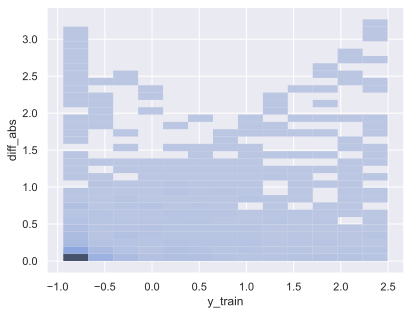

In [59]:
sns.histplot(df, x='y_train', y='diff_abs')

In [60]:
predictions = rf_model.predict(X_valid[features])
mse = mean_squared_error(y_valid_normalized, predictions)
mae = mean_absolute_error(y_valid_normalized, predictions)
mape = mean_absolute_percentage_error(y_valid_normalized, predictions)
r2 = r2_score(y_valid_normalized, predictions)

mse, mae, mape, r2

(8.460883219753763, 2.6815067003145203, 0.8043604045058267, -23.81894118988016)

In [61]:
predictions = rf_model.predict(X_test[features])
mse = mean_squared_error(y_test_normalized, predictions)
mae = mean_absolute_error(y_test_normalized, predictions)
mape = mean_absolute_percentage_error(y_test_normalized, predictions)
r2 = r2_score(y_test_normalized, predictions)

mse, mae, mape, r2

(37.3775306586901, 5.83107100111202, 0.8736858694656154, -13.020124880157887)

----

In [62]:
lr_model = LinearRegression()
lr_model.fit(X_train[features], y_train_normalized)

LinearRegression()

In [63]:
predictions = lr_model.predict(X_train[features])
mse = mean_squared_error(y_train_normalized, predictions)
mae = mean_absolute_error(y_train_normalized, predictions)
mape = mean_absolute_percentage_error(y_train_normalized, predictions)
r2 = r2_score(y_train_normalized, predictions)

mse, mae, mape, r2

(0.699806476616947,
 0.6595564572268464,
 2.7481394972039577,
 0.30019352338305294)

In [64]:
predictions = lr_model.predict(X_valid[features])
mse = mean_squared_error(y_valid_normalized, predictions)
mae = mean_absolute_error(y_valid_normalized, predictions)
mape = mean_absolute_percentage_error(y_valid_normalized, predictions)
r2 = r2_score(y_valid_normalized, predictions)

mse, mae, mape, r2

(8.491461270916552, 2.811158688610609, 0.8419276345668275, -23.90863807303044)

In [65]:
predictions = lr_model.predict(X_test[features])
mse = mean_squared_error(y_test_normalized, predictions)
mae = mean_absolute_error(y_test_normalized, predictions)
mape = mean_absolute_percentage_error(y_test_normalized, predictions)
r2 = r2_score(y_test_normalized, predictions)

mse, mae, mape, r2

(37.418160298408374,
 5.903456821595556,
 0.8872288493973729,
 -13.035364854887293)

----

In [66]:
gb_model = GradientBoostingRegressor()
gb_model.fit(X_train[features], y_train_normalized)

GradientBoostingRegressor()

In [67]:
predictions = gb_model.predict(X_train[features])
mse = mean_squared_error(y_train_normalized, predictions)
mae = mean_absolute_error(y_train_normalized, predictions)
mape = mean_absolute_percentage_error(y_train_normalized, predictions)
r2 = r2_score(y_train_normalized, predictions)

mse, mae, mape, r2

(0.40215792598816247,
 0.4822394722932931,
 3.4879772984098363,
 0.5978420740118375)

In [68]:
predictions = gb_model.predict(X_valid[features])
mse = mean_squared_error(y_valid_normalized, predictions)
mae = mean_absolute_error(y_valid_normalized, predictions)
mape = mean_absolute_percentage_error(y_valid_normalized, predictions)
r2 = r2_score(y_valid_normalized, predictions)

mse, mae, mape, r2

(7.9282725104455425, 2.725497438041848, 0.8193887508947887, -22.25659438422294)

In [69]:
predictions = gb_model.predict(X_test[features])
mse = mean_squared_error(y_test_normalized, predictions)
mae = mean_absolute_error(y_test_normalized, predictions)
mape = mean_absolute_percentage_error(y_test_normalized, predictions)
r2 = r2_score(y_test_normalized, predictions)

mse, mae, mape, r2

(36.477849321143985,
 5.818860707023535,
 0.8729325513994782,
 -12.682658908424107)

----

### reg results before droping outliers

In [112]:
model_names = ['RandomForestRegressor', 'LinearRegression', 'GradientBoostingRegressor']
mse_scores_train_df_before = [0.5015742019441553, 0.7412092137437033, 0.4771048631550192]
mae_scores_train_df_before = [0.4532085138791801, 0.6897460506918579, 0.5332512587037043]
mape_scores_train_df_before = [1.512721692463593, 1.429824451163204, 1.335912542783414]
r2_scores_train_df_before = [0.49842579805584486, 0.2587907862562969, 0.5228951368449809]

mse_scores_valid_df_before = [8.113304187694286, 9.596298859644117, 8.06151080484459]
mae_scores_valid_df_before = [2.6270560941639745, 2.9892445951316233, 2.7296333461137494]
mape_scores_valid_df_before = [0.7398833748303753, 0.8426959395765632, 0.7674301193825258]
r2_scores_valid_df_before = [-16.534786449373136, -19.73989182649428, -16.422848589439628]

mse_scores_test_df_before = [79.43302517848451, 78.79219842232558, 76.94650560879026]
mae_scores_test_df_before = [7.81365051292816, 7.908554132985284, 7.738771836126316]
mape_scores_test_df_before = [0.8616101809817467, 0.8826070353787667, 0.8557665160788641]
r2_scores_test_df_before = [-3.301923977872166, -3.267218161471649, -3.16725935778146]

In [113]:
data_before = {
    'Model': model_names,
    'MSE_train': mse_scores_train_df_before,
    'MAE_train': mae_scores_train_df_before,
    'MAPE_train': mape_scores_train_df_before,
    'R2_train': r2_scores_train_df_before,
    'MSE_valid': mse_scores_valid_df_before,
    'MAE_valid': mae_scores_valid_df_before,
    'MAPE_valid': mape_scores_valid_df_before,
    'R2_valid': r2_scores_valid_df_before,
    'MSE_test': mse_scores_test_df_before,
    'MAE_test': mae_scores_test_df_before,
    'MAPE_test': mape_scores_test_df_before,
    'R2_test': r2_scores_test_df_before
}

In [114]:
df_scores_before = pd.DataFrame(data_before)

In [115]:
df_scores_before

,Model,MSE_train,MAE_train,MAPE_train,R2_train,MSE_valid,MAE_valid,MAPE_valid,R2_valid,MSE_test,MAE_test,MAPE_test,R2_test
0,RandomForestRegressor,0.501574,0.453209,1.512722,0.498426,8.113304,2.627056,0.739883,-16.534786,79.433025,7.813651,0.861610,-3.301924
1,LinearRegression,0.741209,0.689746,1.429824,0.258791,9.596299,2.989245,0.842696,-19.739892,78.792198,7.908554,0.882607,-3.267218
2,GradientBoostingRegressor,0.477105,0.533251,1.335913,0.522895,8.061511,2.729633,0.767430,-16.422849,76.946506,7.738772,0.855767,-3.167259


### reg results after droping outliers

In [116]:
model_names = ['RandomForestRegressor', 'LinearRegression', 'GradientBoostingRegressor']
mse_scores_train_df_after = [0.5367467195784751, 0.6998064766169465, 0.40215792598816247]
mae_scores_train_df_after = [0.4488761146810867, 0.6595564572268456, 0.4822394722932931]
mape_scores_train_df_after = [3.8761233268352653, 2.7481394972039226, 3.4879772984098363]
r2_scores_train_df_after = [0.4632532804215248, 0.3001935233830534,  0.5978420740118375]

mse_scores_valid_df_after = [7.624627725110595, 8.491461270916572, 7.925751921363544]
mae_scores_valid_df_after = [2.53997842723149, 2.811158688610612, 2.7248862718870135]
mape_scores_valid_df_after = [0.7606743291130803, 0.8419276345668287, 0.8191120261509857]
r2_scores_valid_df_after = [-21.365890438298344, -23.908638073030495, -22.24920055185755]

mse_scores_test_df_after = [36.43967901008311, 37.418160298408395, 36.4826414207766]
mae_scores_test_df_after = [5.735772310457756, 5.903456821595557, 5.819673205692601]
mape_scores_test_df_after = [0.8570337471723358, 0.8872288493973732, 0.8730888119262229]
r2_scores_test_df_after = [-12.668341415578617, -13.035364854887304, -12.68445640103808]

In [117]:
data_after = {
    'Model': model_names,
    'MSE_train': mse_scores_train_df_after,
    'MAE_train': mae_scores_train_df_after,
    'MAPE_train': mape_scores_train_df_after,
    'R2_train': r2_scores_train_df_after,
    'MSE_valid': mse_scores_valid_df_after,
    'MAE_valid': mae_scores_valid_df_after,
    'MAPE_valid': mape_scores_valid_df_after,
    'R2_valid': r2_scores_valid_df_after,
    'MSE_test': mse_scores_test_df_after,
    'MAE_test': mae_scores_test_df_after,
    'MAPE_test': mape_scores_test_df_after,
    'R2_test': r2_scores_test_df_after
}

In [118]:
df_scores_after = pd.DataFrame(data_after)

In [119]:
df_scores_after

,Model,MSE_train,MAE_train,MAPE_train,R2_train,MSE_valid,MAE_valid,MAPE_valid,R2_valid,MSE_test,MAE_test,MAPE_test,R2_test
0,RandomForestRegressor,0.536747,0.448876,3.876123,0.463253,7.624628,2.539978,0.760674,-21.365890,36.439679,5.735772,0.857034,-12.668341
1,LinearRegression,0.699806,0.659556,2.748139,0.300194,8.491461,2.811159,0.841928,-23.908638,37.418160,5.903457,0.887229,-13.035365
2,GradientBoostingRegressor,0.402158,0.482239,3.487977,0.597842,7.925752,2.724886,0.819112,-22.249201,36.482641,5.819673,0.873089,-12.684456


----

In [120]:
df_diff = df_scores_after.drop('Model', axis=1) - df_scores_before.drop('Model', axis=1)

df_diff['Model'] = df_scores_after['Model']

df_diff

,MSE_train,MAE_train,MAPE_train,R2_train,MSE_valid,MAE_valid,MAPE_valid,R2_valid,MSE_test,MAE_test,MAPE_test,R2_test,Model
0,0.035173,-0.004332,2.363402,-0.035173,-0.488676,-0.087078,0.020791,-4.831104,-42.993346,-2.077878,-0.004576,-9.366417,RandomForestRegressor
1,-0.041403,-0.030190,1.318315,0.041403,-1.104838,-0.178086,-0.000768,-4.168746,-41.374038,-2.005097,0.004622,-9.768147,LinearRegression
2,-0.074947,-0.051012,2.152065,0.074947,-0.135759,-0.004747,0.051682,-5.826352,-40.463864,-1.919099,0.017322,-9.517197,GradientBoostingRegressor


----

## Classification for is_USA {1 - USA, 0 - outside}

In [286]:
df.shape

(1835, 21)

In [256]:
X_train_counts = X_train[features]['is_USA'].value_counts()
X_train_counts

1    1052
0     416
Name: is_USA, dtype: int64

In [257]:
1052/1468

0.7166212534059946

In [258]:
X_test_counts = X_test[features]['is_USA'].value_counts()
X_test_counts

1    165
0     19
Name: is_USA, dtype: int64

In [259]:
156/184

0.8478260869565217

In [260]:
X_valid_counts = X_valid[features]['is_USA'].value_counts()
X_valid_counts

1    159
0     24
Name: is_USA, dtype: int64

In [261]:
159/183

0.8688524590163934

----

In [341]:
x_train = X_train[features].drop('is_USA', axis=1)
y_train = X_train[features]['is_USA']

x_val = X_valid[features].drop('is_USA', axis=1)
y_val = X_valid[features]['is_USA']

x_test = X_test[features].drop('is_USA', axis=1)
y_test = X_test[features]['is_USA']

In [342]:
x_train.columns

Index(['color_ohe', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'cast_total_facebook_likes', 'language_ohe',
       'budget_normalized', 'title_year', 'imdb_score', 'Comedy', 'Thriller',
       'Romance', 'Drama'],
      dtype='object')

----

In [343]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [344]:
y_train_pred = rf_classifier.predict(x_train)
y_test_pred = rf_classifier.predict(x_test)
y_val_pred = rf_classifier.predict(x_val)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
val_accuracy = accuracy_score(y_val, y_val_pred)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)
print("Validation Accuracy:", val_accuracy)

print("Classification Report:")
print(classification_report(y_test, y_test_pred))

Training Accuracy: 1.0
Testing Accuracy: 0.875
Validation Accuracy: 0.8415300546448088
Classification Report:
              precision    recall  f1-score   support

           0       0.30      0.16      0.21        19
           1       0.91      0.96      0.93       165

    accuracy                           0.88       184
   macro avg       0.60      0.56      0.57       184
weighted avg       0.85      0.88      0.86       184



In [345]:
accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)
roc_auc = roc_auc_score(y_test, y_test_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("ROC-AUC:", roc_auc)

Accuracy: 0.875
Precision: 0.9080459770114943
Recall: 0.9575757575757575
F1-score: 0.9321533923303833
ROC-AUC: 0.5577352472089314


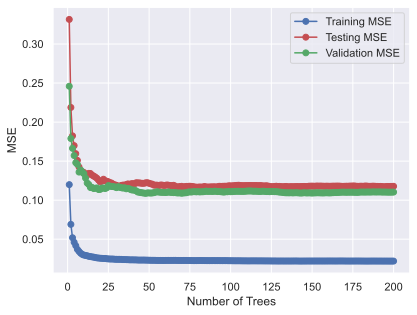

In [346]:
rf_model = RandomForestClassifier(n_estimators=200, random_state=42)
history = rf_model.fit(x_train, y_train)

y_train_pred = rf_model.predict(x_train)
y_test_pred = rf_model.predict(x_test)
y_valid_pred = rf_model.predict(x_val)

train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
valid_mse = mean_squared_error(y_val, y_valid_pred)

num_trees = range(1, len(rf_model.estimators_) + 1)
train_mse_history = []
test_mse_history = []
valid_mse_history = []

for i in num_trees:
    y_train_pred_stage = np.mean([est.predict(x_train) for est in rf_model.estimators_[:i]], axis=0)
    y_test_pred_stage = np.mean([est.predict(x_test) for est in rf_model.estimators_[:i]], axis=0)
    y_valid_pred_stage = np.mean([est.predict(x_val) for est in rf_model.estimators_[:i]], axis=0)
    
    train_mse_history.append(mean_squared_error(y_train, y_train_pred_stage))
    test_mse_history.append(mean_squared_error(y_test, y_test_pred_stage))
    valid_mse_history.append(mean_squared_error(y_val, y_valid_pred_stage))

plt.plot(num_trees, train_mse_history, 'b', marker='o', label='Training MSE')
plt.plot(num_trees, test_mse_history, 'r', marker='o', label='Testing MSE')
plt.plot(num_trees, valid_mse_history, 'g', marker='o', label='Validation MSE')
plt.xlabel('Number of Trees')
plt.ylabel('MSE')
plt.legend()
plt.show()

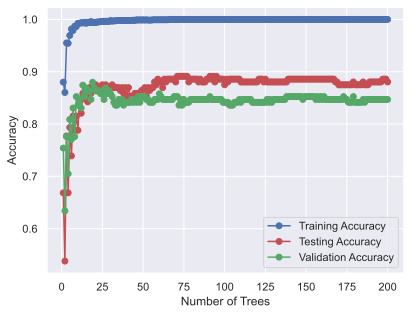

In [347]:
rf_model = RandomForestClassifier(n_estimators=200, random_state=42)
history = rf_model.fit(x_train, y_train)

y_train_pred = rf_model.predict(x_train)
y_test_pred = rf_model.predict(x_test)
y_valid_pred = rf_model.predict(x_val)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
valid_accuracy = accuracy_score(y_val, y_valid_pred)

num_trees = range(1, len(rf_model.estimators_) + 1)
train_accuracy_history = []
test_accuracy_history = []
valid_accuracy_history = []

for i in num_trees:
    y_train_pred_stage = np.mean([est.predict(x_train) for est in rf_model.estimators_[:i]], axis=0)
    y_test_pred_stage = np.mean([est.predict(x_test) for est in rf_model.estimators_[:i]], axis=0)
    y_valid_pred_stage = np.mean([est.predict(x_val) for est in rf_model.estimators_[:i]], axis=0)
    
    # Convert continuous predictions to binary predictions using a threshold (e.g., 0.5)
    y_train_pred_stage_binary = (y_train_pred_stage > 0.5).astype(int)
    y_test_pred_stage_binary = (y_test_pred_stage > 0.5).astype(int)
    y_valid_pred_stage_binary = (y_valid_pred_stage > 0.5).astype(int)
    
    train_accuracy_history.append(accuracy_score(y_train, y_train_pred_stage_binary))
    test_accuracy_history.append(accuracy_score(y_test, y_test_pred_stage_binary))
    valid_accuracy_history.append(accuracy_score(y_val, y_valid_pred_stage_binary))

plt.plot(num_trees, train_accuracy_history, 'b', marker='o', label='Training Accuracy')
plt.plot(num_trees, test_accuracy_history, 'r', marker='o', label='Testing Accuracy')
plt.plot(num_trees, valid_accuracy_history, 'g', marker='o', label='Validation Accuracy')
plt.xlabel('Number of Trees')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

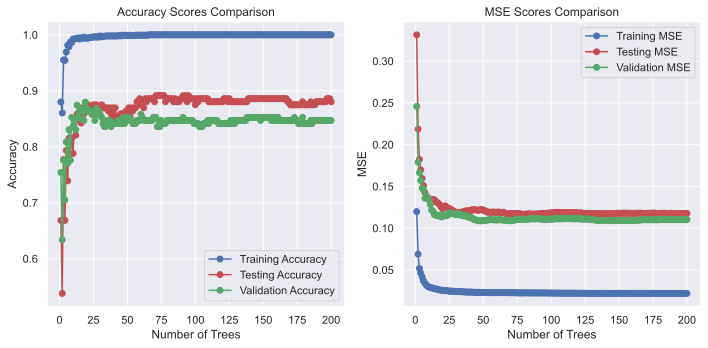

In [348]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Plotting the Accuracy
ax1.plot(num_trees, train_accuracy_history, 'b', marker='o', label='Training Accuracy')
ax1.plot(num_trees, test_accuracy_history, 'r', marker='o', label='Testing Accuracy')
ax1.plot(num_trees, valid_accuracy_history, 'g', marker='o', label='Validation Accuracy')
ax1.set_xlabel('Number of Trees')
ax1.set_ylabel('Accuracy')
ax1.legend()
ax1.set_title('Accuracy Scores Comparison')

# Plotting the MSE
ax2.plot(num_trees, train_mse_history, 'b', marker='o', label='Training MSE')
ax2.plot(num_trees, test_mse_history, 'r', marker='o', label='Testing MSE')
ax2.plot(num_trees, valid_mse_history, 'g', marker='o', label='Validation MSE')
ax2.set_xlabel('Number of Trees')
ax2.set_ylabel('MSE')
ax2.legend()
ax2.set_title('MSE Scores Comparison')

plt.tight_layout()
plt.show()

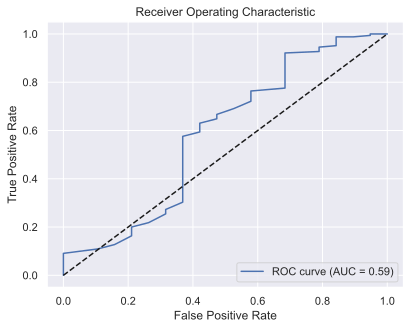

In [269]:
probs = rf_classifier.predict_proba(x_test)[:, 1] 

fpr, tpr, thresholds = roc_curve(y_test, probs)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random guessing
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

----

## Let's add duplicates of "not_USA" and try once again

----

In [288]:
X_train[features].shape

(1468, 14)

In [304]:
non_usa_rows = X_train[X_train['is_USA'] == 0]

duplicated_rows = pd.concat([non_usa_rows] * 2, ignore_index=True)

X_train_dup = pd.concat([X_train, duplicated_rows], ignore_index=True)

X_train_dup.shape

(2300, 28)

In [305]:
X_test[features].shape

(184, 14)

In [318]:
non_usa_rows = X_test[X_test['is_USA'] == 0]

duplicated_rows = pd.concat([non_usa_rows] * 6, ignore_index=True)

X_test_dup = pd.concat([X_test, duplicated_rows], ignore_index=True)

X_test_dup.shape

(298, 28)

In [319]:
X_valid[features].shape

(183, 14)

In [320]:
non_usa_rows = X_valid[X_valid['is_USA'] == 0]

duplicated_rows = pd.concat([non_usa_rows] * 4, ignore_index=True)

X_valid_dup = pd.concat([X_valid, duplicated_rows], ignore_index=True)

X_valid_dup.shape

(279, 28)

In [321]:
X_train_counts = X_train_dup[features]['is_USA'].value_counts()
X_train_counts

0    1248
1    1052
Name: is_USA, dtype: int64

In [322]:
X_test_counts = X_test_dup[features]['is_USA'].value_counts()
X_test_counts

1    165
0    133
Name: is_USA, dtype: int64

In [323]:
X_valid_counts = X_valid_dup[features]['is_USA'].value_counts()
X_valid_counts

1    159
0    120
Name: is_USA, dtype: int64

In [324]:
x_train = X_train_dup[features].drop('is_USA', axis=1)
y_train = X_train_dup[features]['is_USA']

x_val = X_valid_dup[features].drop('is_USA', axis=1)
y_val = X_valid_dup[features]['is_USA']

x_test = X_test_dup[features].drop('is_USA', axis=1)
y_test = X_test_dup[features]['is_USA']

In [325]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [326]:
y_train_pred = rf_classifier.predict(x_train)
y_test_pred = rf_classifier.predict(x_test)
y_val_pred = rf_classifier.predict(x_val)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
val_accuracy = accuracy_score(y_val, y_val_pred)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)
print("Validation Accuracy:", val_accuracy)

print("Classification Report:")
print(classification_report(y_test, y_test_pred))

Training Accuracy: 1.0
Testing Accuracy: 0.587248322147651
Validation Accuracy: 0.7060931899641577
Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.21      0.31       133
           1       0.58      0.89      0.71       165

    accuracy                           0.59       298
   macro avg       0.60      0.55      0.51       298
weighted avg       0.59      0.59      0.53       298



In [327]:
accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)
roc_auc = roc_auc_score(y_test, y_test_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("ROC-AUC:", roc_auc)

Accuracy: 0.587248322147651
Precision: 0.5833333333333334
Recall: 0.8909090909090909
F1-score: 0.7050359712230215
ROC-AUC: 0.5507177033492823


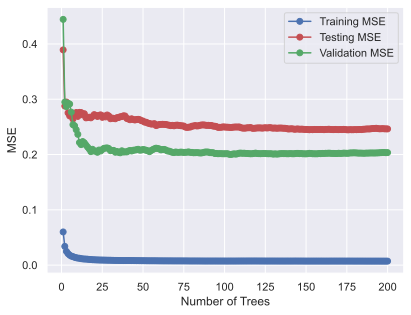

In [336]:
rf_model = RandomForestClassifier(n_estimators=200, random_state=42)
history = rf_model.fit(x_train, y_train)

y_train_pred = rf_model.predict(x_train)
y_test_pred = rf_model.predict(x_test)
y_valid_pred = rf_model.predict(x_val)

train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
valid_mse = mean_squared_error(y_val, y_valid_pred)

num_trees = range(1, len(rf_model.estimators_) + 1)
train_mse_history = []
test_mse_history = []
valid_mse_history = []

for i in num_trees:
    y_train_pred_stage = np.mean([est.predict(x_train) for est in rf_model.estimators_[:i]], axis=0)
    y_test_pred_stage = np.mean([est.predict(x_test) for est in rf_model.estimators_[:i]], axis=0)
    y_valid_pred_stage = np.mean([est.predict(x_val) for est in rf_model.estimators_[:i]], axis=0)
    
    train_mse_history.append(mean_squared_error(y_train, y_train_pred_stage))
    test_mse_history.append(mean_squared_error(y_test, y_test_pred_stage))
    valid_mse_history.append(mean_squared_error(y_val, y_valid_pred_stage))

plt.plot(num_trees, train_mse_history, 'b', marker='o', label='Training MSE')
plt.plot(num_trees, test_mse_history, 'r', marker='o', label='Testing MSE')
plt.plot(num_trees, valid_mse_history, 'g', marker='o', label='Validation MSE')
plt.xlabel('Number of Trees')
plt.ylabel('MSE')
plt.legend()
plt.show()

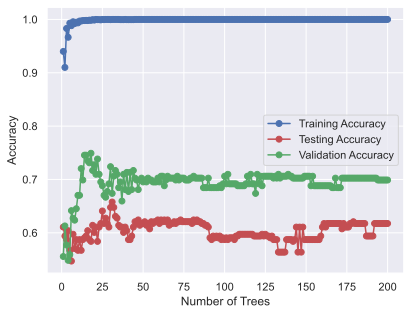

In [337]:
rf_model = RandomForestClassifier(n_estimators=200, random_state=42)
history = rf_model.fit(x_train, y_train)

y_train_pred = rf_model.predict(x_train)
y_test_pred = rf_model.predict(x_test)
y_valid_pred = rf_model.predict(x_val)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
valid_accuracy = accuracy_score(y_val, y_valid_pred)

num_trees = range(1, len(rf_model.estimators_) + 1)
train_accuracy_history = []
test_accuracy_history = []
valid_accuracy_history = []

for i in num_trees:
    y_train_pred_stage = np.mean([est.predict(x_train) for est in rf_model.estimators_[:i]], axis=0)
    y_test_pred_stage = np.mean([est.predict(x_test) for est in rf_model.estimators_[:i]], axis=0)
    y_valid_pred_stage = np.mean([est.predict(x_val) for est in rf_model.estimators_[:i]], axis=0)
    
    # Convert continuous predictions to binary predictions using a threshold (e.g., 0.5)
    y_train_pred_stage_binary = (y_train_pred_stage > 0.5).astype(int)
    y_test_pred_stage_binary = (y_test_pred_stage > 0.5).astype(int)
    y_valid_pred_stage_binary = (y_valid_pred_stage > 0.5).astype(int)
    
    train_accuracy_history.append(accuracy_score(y_train, y_train_pred_stage_binary))
    test_accuracy_history.append(accuracy_score(y_test, y_test_pred_stage_binary))
    valid_accuracy_history.append(accuracy_score(y_val, y_valid_pred_stage_binary))

plt.plot(num_trees, train_accuracy_history, 'b', marker='o', label='Training Accuracy')
plt.plot(num_trees, test_accuracy_history, 'r', marker='o', label='Testing Accuracy')
plt.plot(num_trees, valid_accuracy_history, 'g', marker='o', label='Validation Accuracy')
plt.xlabel('Number of Trees')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

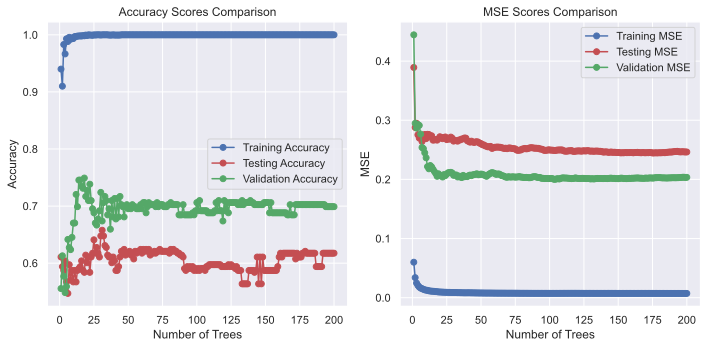

In [340]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Plotting the Accuracy
ax1.plot(num_trees, train_accuracy_history, 'b', marker='o', label='Training Accuracy')
ax1.plot(num_trees, test_accuracy_history, 'r', marker='o', label='Testing Accuracy')
ax1.plot(num_trees, valid_accuracy_history, 'g', marker='o', label='Validation Accuracy')
ax1.set_xlabel('Number of Trees')
ax1.set_ylabel('Accuracy')
ax1.legend()
ax1.set_title('Accuracy Scores Comparison')

# Plotting the MSE
ax2.plot(num_trees, train_mse_history, 'b', marker='o', label='Training MSE')
ax2.plot(num_trees, test_mse_history, 'r', marker='o', label='Testing MSE')
ax2.plot(num_trees, valid_mse_history, 'g', marker='o', label='Validation MSE')
ax2.set_xlabel('Number of Trees')
ax2.set_ylabel('MSE')
ax2.legend()
ax2.set_title('MSE Scores Comparison')

plt.tight_layout()
plt.show()

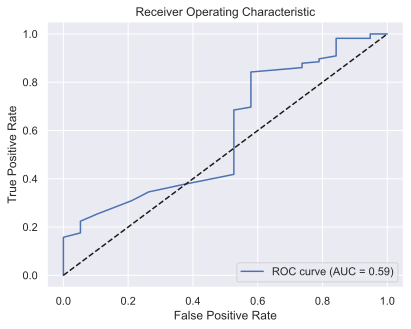

In [331]:
probs = rf_classifier.predict_proba(x_test)[:, 1] 

fpr, tpr, thresholds = roc_curve(y_test, probs)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random guessing
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()